<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>STATISTIEK IN PYTHON 3: DATA VISUALISEREN (HISTOGRAM)</h1> 
    </font>
</div>

In deze notebook leer je hoe je een histogram genereert met Python.

### Importeer eerst de nodige modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In deze notebook zal je de dataset in het bestand `belgischebevolking2023leeftijd.csv` visueel voorstellen. Deze dataset bevat de Belgische bevolking ingedeeld volgens leeftijd. De data werden gedeeld door STATBEL [1].<br>
STATBEL beschouwt echter alle mensen van 100 en meer als '100-jarigen', terwijl de andere leeftijden voor elk leeftijdsjaar apart worden beschouwd. Daarom werd de groep van '100-jarigen' kunstmatig opgedeeld voor elke apart leeftijdsjaar vanaf 100 jaar t.e.m. 110 jaar, ermee rekening houdend dat de oudste Belg 110 jaar oud is [2].

<div>
    <font color=#690027 markdown="1">
        <h2>1. Dataset</h2> 
    </font>
</div>

### Opdracht 1.1

Laad eerst de dataset in, verwijs ernaar met de variabele `bevolking` en geef ze weer op het scherm. De bestandsnaam is `belgischebevolking2023leeftijd.csv` en je vindt het bestand in de map `data`. 

In [2]:
bevolking = pd.read_csv("data/belgischebevolking2023leeftijd.csv")
bevolking

,leeftijd,aantal
0,0,114059
1,1,120071
2,2,116964
3,3,120787
4,4,122585
...,...,...
106,106,25
107,107,10
108,108,1
109,109,0


De steekproefvariabele is hier een **kwantitatieve** of **numerieke variabele**. 

<AxesSubplot:xlabel='leeftijd'>

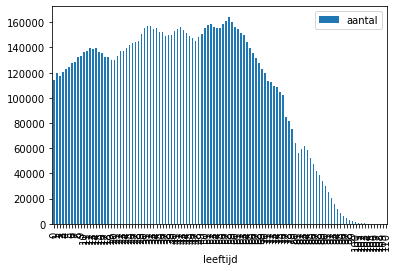

In [3]:
bevolking.plot.bar("leeftijd", "aantal")

<div>
    <font color=#690027 markdown="1">
        <h2>2. Histogram</h2> 
    </font>
</div>

Je zal deze data op een overzichtelijke manier voorstellen in leeftijdsklassen per 10 jaar. (Door 10 jaar te kiezen als klassebreedte, wordt de kunstmatige opdeling tenietgedaan.)

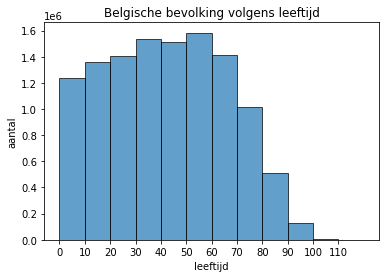

In [8]:
# histogram van de leeftijdsgroepen

klassebreedte = 10

# intervallen
bins = [min(bevolking["leeftijd"]) + i * klassebreedte for i in range((max(bevolking["leeftijd"]) - min(bevolking["leeftijd"])) // klassebreedte + 2)]

# plot histogram
plt.hist(bevolking["leeftijd"], bins=bins, weights=bevolking["aantal"], edgecolor='k', alpha=0.7)

plt.xlabel("leeftijd")
plt.ylabel("aantal")
plt.title("Belgische bevolking volgens leeftijd")

plt.xticks(range(min(bevolking["leeftijd"]), max(bevolking["leeftijd"]) + klassebreedte, klassebreedte))

plt.show()


In [9]:
# totaal bevolkingsaantal
aantal = bevolking["aantal"]
totaal = aantal.sum()
print(totaal)

11697557


### Referentielijst

[1] Bevolking naar geslacht en leeftijdsgroep - België, laatste jaar. https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=5fee32f5-29b0-40df-9fb9-af43d1ac9032<br>
[2] vrt. *Oudste Belg Marcelle Lévaz op 111-jarige leeftijd overleden*. https://www.vrt.be/vrtnws/nl/2022/11/14/oudste-belg-marcelle-levaz-op-111-jarige-leeftijd-overleden/

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook python in wiskunde - Statistiek, van D. De Bolster, F. wyffels & N. Gesquière in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.